# Machine learning for big data - Assignment 3
# Multiple linear regression
** Exercise 3.3 **

**3.3.1.** Import required libraries and read the file

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import scipy
import pandas as pd

In [3]:
file='prix-immobilier-notaire-agglomeration_cle245eb4.xls'
df=pd.read_excel(file)

Store feature (input) column and puts it in vertical array shape

In [4]:
x1=df['Revenu imposable brut par ménage 2006'].values
x1=x1.reshape(-1,1)

Store observation (output) column and puts it in vertical array shape

In [5]:
y=df['Prix moyen par logement actualisé à 2006'].values
y=y.reshape(-1,1)

Number of observations (data size)

In [6]:
n = len(y)

Plot data points

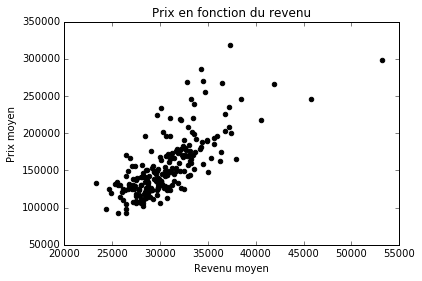

In [7]:
%matplotlib inline
plt.scatter(x1, y,  color='black');
plt.title('Prix en fonction du revenu');
plt.xlabel('Revenu moyen');
plt.ylabel('Prix moyen');
plt.show();

**3.3.2.** Create and fit simple linear regression model

In [8]:
# Create the linear regression object
regr = linear_model.LinearRegression()
regr.fit(x1, y);

Plot data points and predicted output from fitted model

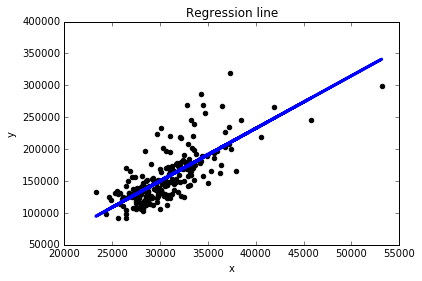

In [9]:
plt.scatter(x1, y,  color='black')
plt.plot(x1, regr.predict(x1), color='blue',linewidth=3)
plt.title('Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Parameter values $\beta_j$

In [10]:
print('Partial slope: %.2f' % regr.coef_)
print('Intercept: %.2f' % regr.intercept_)

Partial slope: 8.25
Intercept: -97272.43


Mean squared error of predicted outputs - residual variance estimate

In [11]:
MSE = np.sum((regr.predict(x1) - y) ** 2)/(n-2)
print('Residual variance estimate: %.2f'% MSE)

Residual variance estimate: 759981683.85


Coefficient of determination $R^2$ ($1$ is ideal)

In [12]:
print('Coefficient of determination: %.2f' % regr.score(x1, y))

Coefficient of determination: 0.55


Standard deviations and standardized residuals

In [13]:
varhat=np.sum((regr.predict(x1) - y) ** 2)/(n-2)
SSTx=np.sum((x1 - np.mean(x1)) ** 2)
h=1/n+((x1-np.mean(x1))**2/SSTx)
residuals=(regr.predict(x1) - y)
T=np.divide(residuals,np.sqrt(1-h))/np.sqrt(varhat) # standardized residuals

Standardized residues plot

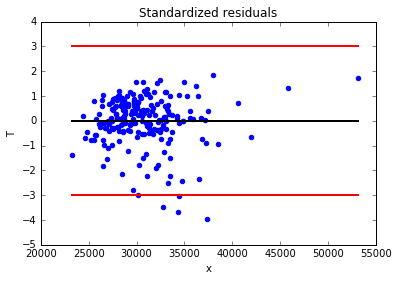

In [14]:
plt.scatter(x1, T, color='blue')
plt.plot(np.linspace(min(x1),max(x1),10),3*np.ones(10),c='red',linewidth=2.0)
plt.plot(np.linspace(min(x1),max(x1),10),-3*np.ones(10),c='red',linewidth=2.0)
plt.plot(np.linspace(min(x1),max(x1),10),np.zeros(10),c='k',linewidth=2.0)
plt.title('Standardized residuals')
plt.xlabel('x')
plt.ylabel('T')
plt.show()

Normal Q-Q plot to assess non gaussianity

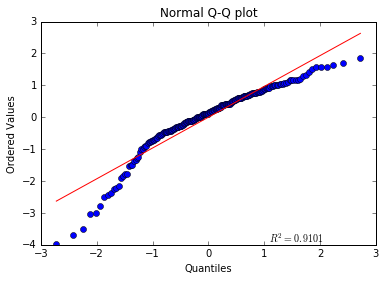

In [15]:
scipy.stats.probplot(np.squeeze(T), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Estimated parameters and hypothesis testing

In [16]:
beta1hat=regr.coef_ # estimated parameters
t=beta1hat/np.sqrt(varhat/SSTx) # t-statistics
alpha=0.01 # significance level
t_thres = scipy.stats.t.ppf(1-alpha/2, n - 2) # threshold
print('Decision statistics = %.2f' % t)
print('Decision threshold = %.2f' % t_thres)

Decision statistics = 16.02
Decision threshold = 2.60


Except for strong non Gaussianity of the residuals and an $R^2$ not very close to $1$, the hypothesis test
indicates that the output is quite related to the considered input. Simple linear regression seems to explain
well only a part of the data. 

**3.3.3.** Loading other features

In [17]:
x1=df['Revenu imposable brut par ménage 2006'].values

In [18]:
x2=df['Nombre de ménages 2006'].values

In [19]:
x3=df['% de résidences secondaires'].values

Store features in a matrix

In [20]:
X=np.array([x1,x2,x3])
X=np.transpose(X)
n,p=np.shape(X) # data size and number of features 

Create and fit multiple linear regressor

In [21]:
regr2 = linear_model.LinearRegression()
regr2.fit(X, y);

Parameter values $\beta_j$

In [22]:
print('Coefficients: ', regr2.coef_)
print('Intercept: ', regr2.intercept_)

Coefficients:  [[  7.73992083e+00   1.40817439e-02   5.83840818e+04]]
Intercept:  [-86321.86588676]


Mean squared error of predicted outputs - residual variance estimate

In [23]:
MSE = np.sum((regr2.predict(X) - y) ** 2)/(n-(1+p))
print('Residual variance estimate: %.2f'% MSE)

Residual variance estimate: 716831767.01


Coefficient of determination $R^2$ ($1$ is ideal)

In [24]:
print('Coefficient of determination: %.2f' % regr2.score(X, y))

Coefficient of determination: 0.58


We can clearly see that the MSE on the predicted outputs decreases while the coefficient of determination increases a bit. These two facts point to an improvement, however we cannot be sure that such an improvement is significant.

**3.3.4. and 3.3.5.** Compute VIF and confidence intervals for each $\beta_j$

In [25]:
# Initial allocation of required arrays
VIF = np.zeros(p)
R_2 = np.zeros(p)
S_x = np.zeros(p)
sigma_beta = np.zeros(p)
# Estimation of noise standard deviation
sigma_e = np.sqrt(MSE)
# Create the linear regression object
regr_x = linear_model.LinearRegression()
alpha=0.05 # significance level
t_Quantile = scipy.stats.t.ppf(1-alpha/2, n -(p+1)) # threshold
b_hat = np.squeeze(regr2.coef_) # command required to have a vector of parameters (not a matrix)
b_int = np.zeros((p,2))
# Loop to evaluate different VIF and confidence intervals
for j in range(0,p):
    # Evaluation of the regressor prediction quality from other regressors
    X_m = np.delete(X, j, 1) # Delete the feature column to be regressed from the features matrix
    regr_x.fit(X_m, X[:,j]) # Fit the regressor using the others
    R_2[j] = regr_x.score(X_m, X[:,j]) # Evaluate its coefficient of determination (0 is ideal)
    # Evaluation of the VIF
    VIF[j] = 1/(1-(R_2[j]))
    # Evaluation of the confidence intervals
    S_x[j] = np.sum((X[:,j]-np.mean(X[:,j]))**2)
    sigma_beta[j] = sigma_e*np.sqrt(1/(S_x[j]*(1-R_2[j])))
    b_int[j,0] = b_hat[j]-sigma_beta[j]*t_Quantile
    b_int[j,1] = b_hat[j]+sigma_beta[j]*t_Quantile

In [26]:
#Print VIF (VIF < 10 is ideal)
print('Variance inflation factors : \t [1] \t [2] \t [3]\n')
print('\t\t\t\t %.2f \t %.2f \t %.2f' %(VIF[0], VIF[1], VIF[2]))
# Print 95% confidence intervals
print('Confidence intervals : \t [1] \t\t [2] \t\t [3]\n')
print('\t\t\t (%.2f,%.2f) \t (%.2f,%.2f) \t (%.2f,%.2f)' %(b_int[0,0],b_int[0,1],b_int[1,0],b_int[1,1],
                                                             b_int[2,0],b_int[2,1]))



Variance inflation factors : 	 [1] 	 [2] 	 [3]

				 1.11 	 1.08 	 1.03
Confidence intervals : 	 [1] 		 [2] 		 [3]

			 (6.70,8.78) 	 (-0.00,0.03) 	 (26769.20,89998.97)


Variables are not multicollinear, all variables can be kept.

**3.3.6.** Hypothesis testing on the overall model: F-test

In [28]:
mean_y = np.mean(y)
MSR = np.sum((regr2.predict(X) - mean_y) ** 2)/p
# F statistic
F = MSR/MSE
# F threshold
F_thres = scipy.stats.f.ppf(1-alpha,p,n-(p+1))
print('Decision statistics : F = %.2f' %F)
print('Decision threshold = %.2f' % F_thres)

Decision statistics : F = 95.69
Decision threshold = 2.65


The model seems to be relavant, however if we apply individual t-tests as shown below, it seems that the output
is insensible to the second feature (number of houses in each town).

In [29]:
t = np.divide(b_hat,sigma_beta)
print('Decision statistics : t_1 = %.2f \t t_2 = %.2f \t t_3 = %.2f' %(t[0],t[1],t[2]))
print('Decision threshold = %.2f' % t_Quantile)

Decision statistics : t_1 = 14.72 	 t_2 = 1.58 	 t_3 = 3.64
Decision threshold = 1.97
